In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.rename(columns ={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


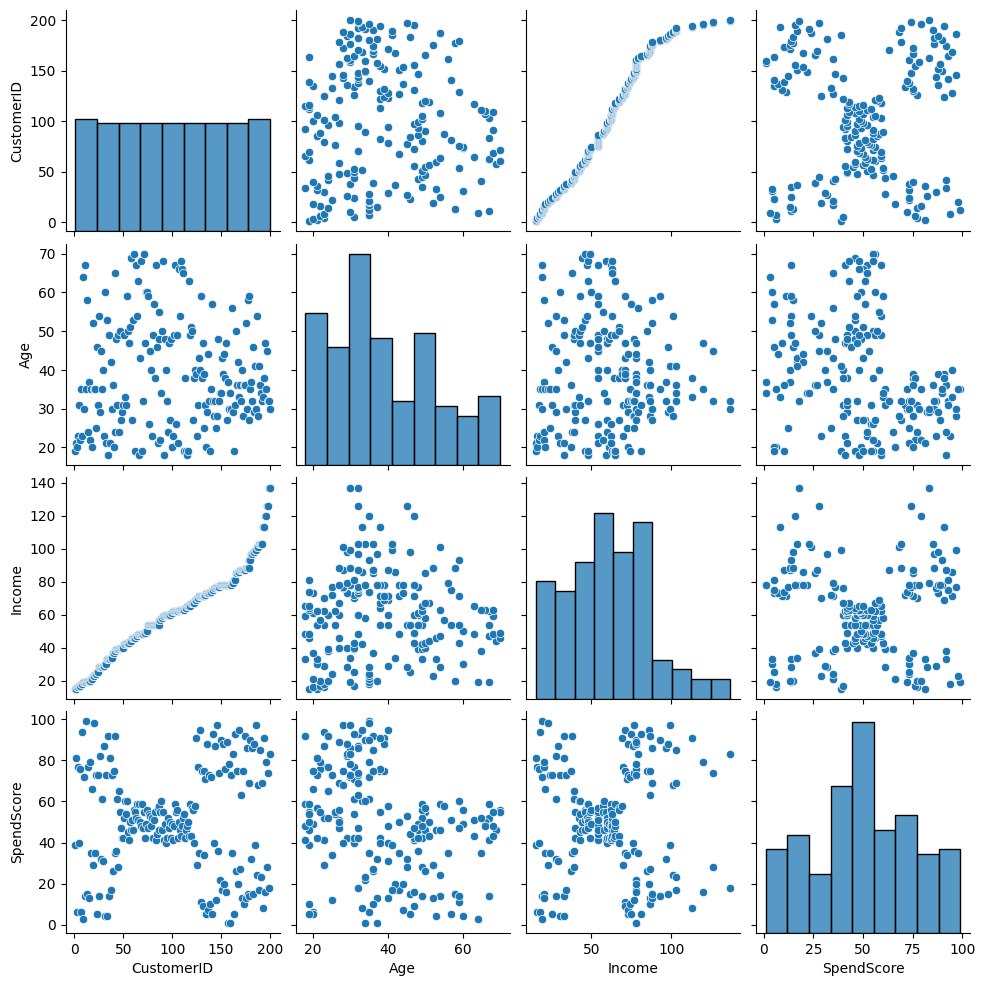

In [9]:
sns.pairplot(df)

#### **From the above diagram, we can say that the customer id is not correlated with income, it's not an useful feature so we can remove that.**

In [10]:
df = df.drop(['CustomerID'],axis=1)

In [11]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### **Plotting some graphs to get idea about trends in business**

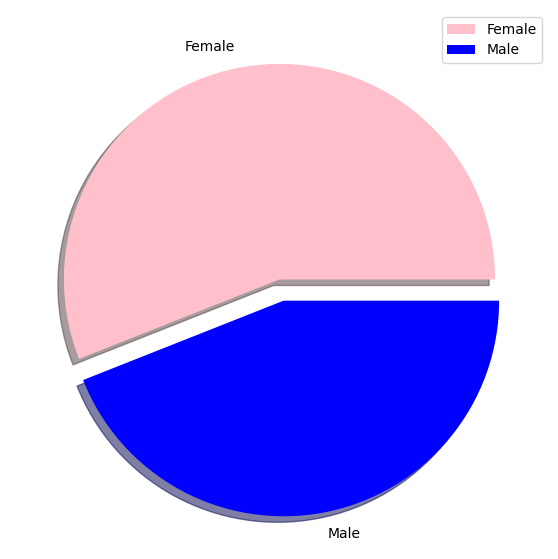

In [12]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

#### **Insights: From the diagram we can say that females are more visiting to mall than males**

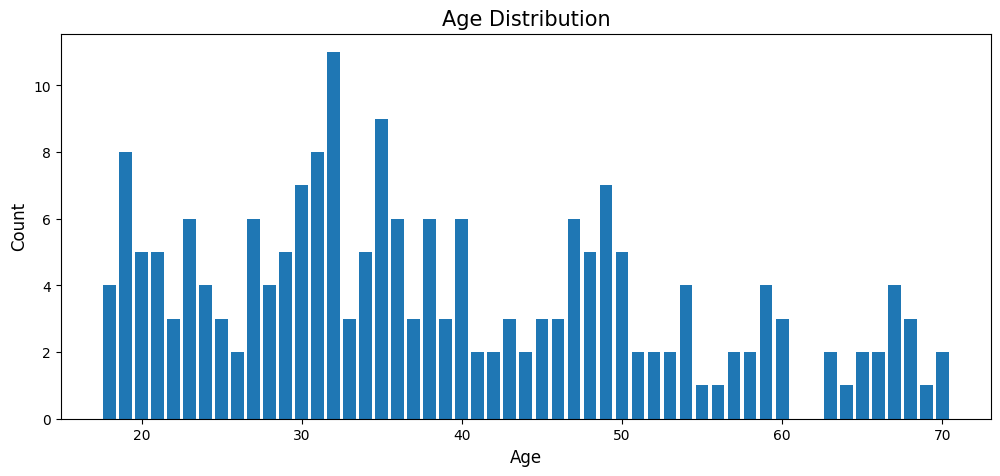

In [13]:
age_counts = df["Age"].value_counts().sort_index()

# Set figure size
plt.figure(figsize=(12, 5))

# Create a bar plot with colorful gradient
colors = sns.color_palette("Spectral", len(age_counts))  # Colorful bars
plt.bar(age_counts.index, age_counts.values)

# Labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution", fontsize=15)

# Show the plot
plt.show()

#### **Insights: Peoples of age between 25 to 40 are mostly visiting mall than other age groups**

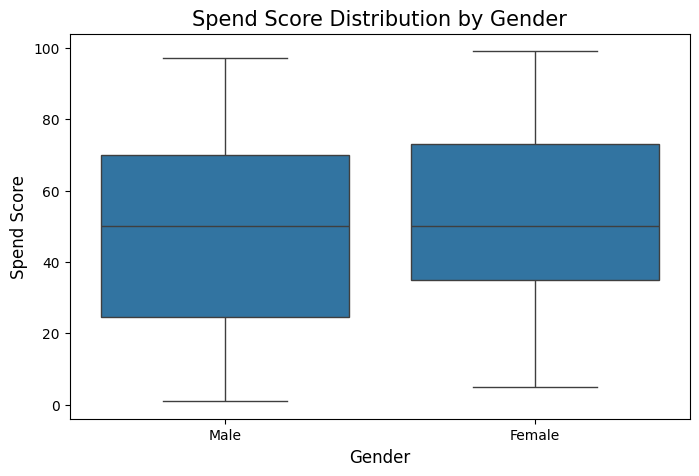

In [14]:
# Create a box plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Gender'], y=df['SpendScore'])

# Add labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Spend Score", fontsize=12)
plt.title("Spend Score Distribution by Gender", fontsize=15)

# Show the plot
plt.show()

#### **This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore**

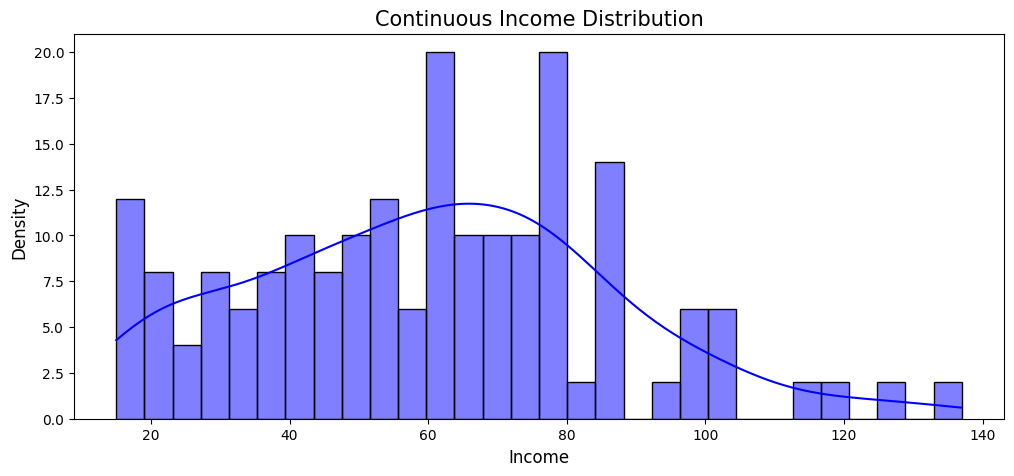

In [15]:


# Set figure size
plt.figure(figsize=(12, 5))

# Create a histogram with density curve
sns.histplot(df["Income"], bins=30, kde=True, color="blue")

# Labels and title
plt.xlabel("Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Continuous Income Distribution", fontsize=15)

# Show the plot
plt.show()


#### **Peoples of salary between 60k and 80k are the mostly visited persons in mall.**

### **Density Based Spacial Clustering of Applications with noise (DBSCAN)**

In [16]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
x=df.iloc[:,[2,3]].values #Extracting features Income and SpendScore to perform DBSCAN

In [18]:
x.shape

(200, 2)

In [19]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [27]:
# importing DBSCAN model from scikit-learn library
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [28]:
#Fitting the model on data i.e. required features.
model=db.fit(x)

In [22]:
label=model.labels_ 
#lables_ : is an attribute of the clustering model object after fitting


In [23]:
label
# label :stores the cluster labels 
# assigned to each data point after fitting a clustering 
# algorithm (like K-Means, DBSCAN, or Agglomerative Clustering).

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [31]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)


sample_cores[db.core_sample_indices_]=True
print(sample_cores)
#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False  True False  True False  True  True False  True False False
  True False  True  True  True  True  True False  True  True False  True
 False  True False  True False False False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False False False False False False False False False  True False  True
 False False False False  True  True False False False False False False
 False False False False False False False  True False  True False  True
 False False False False False False False False Fa

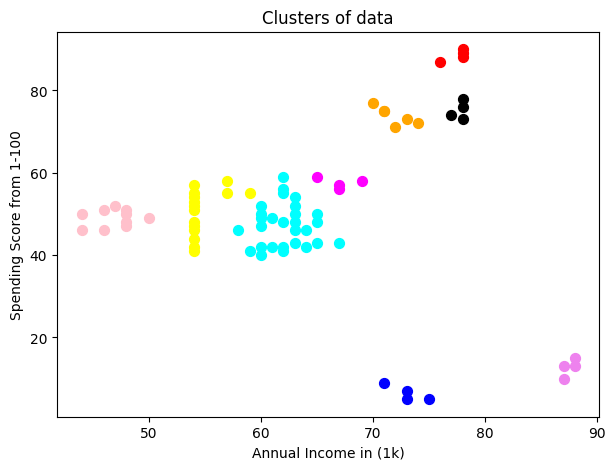

In [32]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

#### **Checking accuracy of model using Silhouette Score**

![alt text](image.png)

In [33]:

from sklearn.metrics import silhouette_score
import numpy as np

# Assuming `X` is your dataset and `label` is the DBSCAN output
# X -> Feature matrix used for clustering
# label -> Cluster labels assigned by DBSCAN

# Remove noise points (-1) before evaluating
mask = label != -1  # Boolean mask to remove -1
filtered_X = x[mask]  # Keep only valid cluster points
filtered_labels = label[mask]  # Keep only valid cluster labels

# Compute Silhouette Score
sil_score = silhouette_score(filtered_X, filtered_labels)

print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.4386
